### Задание 1. Какие выводы можно сделать после анализа таблицы? В каком направлении стоит работать для повышения CTR всей системы?

Загружаем таблицу - Статистика нотификаций в соц. сетях с 2018-10-01 по 2018-10-28

In [147]:
import numpy as np
import pandas as pd

In [159]:
data = pd.read_excel('test.xlsx', sheet_name='Лист1')
data.head()

,Type,VK Sent,VK Hits,VK CTR,MM Sent,MM Hits,MM CTR,OK Sent,OK Hits,OK CTR,...,FB_RU CTR,FB_EN Sent,FB_EN Hits,FB_EN CTR,FS Sent,FS Hits,FS CTR,IG Sent,IG Hits,IG CTR
0,Вам отправили подарок,31791,376,1.18%,1880,105,5.59%,101475,1343,1.32%,...,0.89%,23877,105,0.44%,2049,210,10.25%,0,0,0
1,У вас новое приватное сообщение,36808,1609,4.37%,2606,103,3.95%,120248,2647,2.20%,...,2.75%,10407,336,3.23%,4968,724,14.57%,0,0,0
2,За вами начали ухаживать,2188,66,3.02%,310,12,3.87%,5195,172,3.31%,...,2.07%,501,14,2.79%,285,42,14.74%,0,0,0
3,Вас добавили в друзья,22318,271,1.21%,3137,19,0.61%,12899,219,1.70%,...,1.76%,2951,37,1.25%,1016,22,2.17%,0,0,0
4,Вы потеряли ухаживание,2077,61,2.94%,237,9,3.80%,4748,109,2.30%,...,3.01%,619,19,3.07%,206,29,14.08%,0,0,0


Для анализа таблицы рассчитаем дополнительные показатели - Общее количество показов нотификаций (Total Sent) и общий CTR (Total CTR) по каждой соц сети:

In [149]:
df = [{'Total Sent VK': data['VK Sent'].sum(), 'Total Sent MM': data['MM Sent'].sum(), 'Total Sent OK': data['OK Sent'].sum(), 'Total Sent FB_RU': data['FB_RU Sent'].sum(), 'Total Sent FB_EN': data['FB_EN Sent'].sum(), 'Total Sent FS': data['FS Sent'].sum(), 'Total Sent IG': data['IG Sent'].sum()}]
pd.DataFrame(df)

,Total Sent VK,Total Sent MM,Total Sent OK,Total Sent FB_RU,Total Sent FB_EN,Total Sent FS,Total Sent IG
0,2931405,114433,5331769,712786,723627,201420,27


In [150]:
daf = [{'Total CTR VK': round(data['VK Hits'].sum()*100/data['VK Sent'].sum(),2), 'Total CTR MM': round(data['MM Hits'].sum()*100/data['MM Sent'].sum(),2), 'Total CTR OK': round(data['OK Hits'].sum()*100/data['OK Sent'].sum(),2), 'Total CTR FB_RU': round(data['FB_RU Hits'].sum()*100/data['FB_RU Sent'].sum(),2), 'Total CTR FB_EN': round(data['FB_EN Hits'].sum()*100/data['FB_EN Sent'].sum(),2), 'Total CTR FS': round(data['FS Hits'].sum()*100/data['FS Sent'].sum(),2), 'Total CTR IG': round(0*100/data['IG Sent'].sum(),2)}]
pd.DataFrame(daf)

,Total CTR VK,Total CTR MM,Total CTR OK,Total CTR FB_RU,Total CTR FB_EN,Total CTR FS,Total CTR IG
0,0.8,2.95,0.92,1.09,0.51,3.77,0.0


#### Выводы:
1. Наиболее высокий процент CTR в соц сети FS (ФотоСтрана) - 3,77%, самый низкий - IG (Instant Games в Facebook) - 0%
2. По количеству показов уведомлений можно выделить 2 лидирующие соц сети - ВК и Одноклассники (суммарное количество показов 8 263 174, это 82,5% от общего количества показов), меньше всего показов - Instant Games в Facebook (0,0003% от общего количества)
3. Также можно сделать вывод, что показ уведомлений в Instant Games в Facebook не эффективен, т.к. слишком мало показов и 0% CTR за промежуток времени в 28 дней. Возможно показ уведомлений был настроен некорректно, либо пользователи игры не посещают данную соц сеть, сответственно стоит пересмотреть, либо завершить показ уведомлений в Instant Games в Facebook

Также рассчитаем такие показатели как - Общее количество показов нотификаций (Total Sent), общее количество кликов (Total Hits) и общий CTR (Total CTR) по каждому типу нотификаций, отсортируем по величине CTR:

In [151]:
ds = pd.DataFrame()
ds['Type'] = data['Type']
ds['Total Sent type'] = data[['VK Sent','MM Sent','OK Sent','FB_RU Sent','FB_EN Sent','FS Sent','IG Sent']].sum(axis=1)
ds['Total Hits type'] = data[['VK Hits','MM Hits','OK Hits','FB_RU Hits','FB_EN Hits','FS Hits']].sum(axis=1)
ds['Total CTR type'] = round(ds['Total Hits type']/ds['Total Sent type']*100,2)
ds.sort_values('Total CTR type', ascending=False)

,Type,Total Sent type,Total Hits type,Total CTR type
8,Вам подарили сердечко,8310,399,4.80
2,За вами начали ухаживать,10268,343,3.34
1,У вас новое приватное сообщение,201658,6151,3.05
4,Вы потеряли ухаживание,9579,278,2.90
14,Ваше фото оценили,92490,2207,2.39
22,OFFER_7 (30),137915,3273,2.37
23,OFFER_8 (31),138271,3200,2.31
6,Ваш друг обновил фото,193306,4439,2.30
17,OFFER_2 (23),139471,3178,2.28
19,OFFER_4 (25),137092,3040,2.22


#### Выводы:
1. Наиболее высокий процент CTR у нотификации - Вам подарили сердечко (4,8%), самый низкий - Ваш друг установил игру(0%)
2. По количеству показов уведомлений можно выделить несколько лидирующих уведомлений - Вам доступны бесплатные монеты, BONUS_1 (12), BONUS_4 (15), BONUS_2 (13), BONUS_3 (14), BONUS_5 (16), Получите бесплатные монеты за просмотр рекламы (81,5% от общего количества показов), меньше всего показов - Instant Games в Facebook (0,0002% от общего количества)
3. Также стоит отметить, что уведомления с лидирующим количеством показов при этом имеет меньший CTR, возможно стоит пересмотреть содержание и отображение самого уведомления
4. Уведомление Ваш друг установил игру имеет мало показов и 0% CTR, вероятнее всего данное уведомление не интересно пользователям, стоит пересмотреть настройки по данному уведомлению, либо исключить его из показа

#### В каком направлении стоит работать для повышения CTR всей системы ?
1. Улучшить качество нотификаций: пересмотреть текст нотификации, визуальное отображение (цвет, вид, изображения, соответствует ли стилистике игры) и тд по менее кликабельным уведомлениям.									
2. Пересмотреть те уведомления и соц сети, которые имеют наиболее низкий процент CTR, возможно они не интересны для большинства пользователей и следует совсем исключить их отправку или заменить на более актуальные, т.к. пользователь как правило хочет получать только те уведомления, которые ему полезны									
3. Стоит обратить внимание на количество отправленных уведомлений за сутки и время их отправки (в таблице не присутствует данная информация, но слишком частые уведомления + их отправка в ночное время, либо любое другое время, когда пользователь не активен увеличивает шанс того, что он не перейдет по данному уведомлению)									
4. Для увеличения кликабельности по эффективным уведомлениям, также следует их немного корректировать (перефразировать, возможно изменить отображение и тд), т.к. показ одного и того же уведомления продолжительное время приводит к падению CTR	
								

### Задание 2. Какие выводы вы можете сделать по работе туториала? Укажите направления, где его можно улучшить? (если посчитаете таковые нужными)

Для анализа работы туториала создала отдельную таблицу с количеством пользователей, прошедших шаги на платформе Android и Direct OK. Загружаем:

In [152]:
data2 = pd.read_excel('test2.xlsx', sheet_name='Лист1')
data2

,Type,Android,Direct OK
0,Шаг 0,995,1873
1,Шаг 1,996,1329
2,Шаг 2,957,1199
3,Шаг 3,955,1179
4,Шаг 4,939,1083
5,Шаг 5,928,989
6,Общее количество игроков,998,1992


Посчитаем процентное соотношение пользователей, прошедших определенные шаги к общему количеству пользователей

In [153]:
data2['Android %'] = round(data2['Android']/data2.iloc[6]['Android']*100,2)
data2['Direct OK %'] = round(data2['Direct OK']/data2.iloc[6]['Direct OK']*100,2)

In [154]:
data2

,Type,Android,Direct OK,Android %,Direct OK %
0,Шаг 0,995,1873,99.70,94.03
1,Шаг 1,996,1329,99.80,66.72
2,Шаг 2,957,1199,95.89,60.19
3,Шаг 3,955,1179,95.69,59.19
4,Шаг 4,939,1083,94.09,54.37
5,Шаг 5,928,989,92.99,49.65
6,Общее количество игроков,998,1992,100.00,100.00


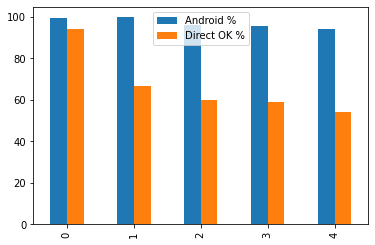

In [155]:
index = data2['Type']
data = {'Android %': data2['Android %'].iloc[0:5],
        'Direct OK %': data2['Direct OK %'].iloc[0:5]}
df = pd.DataFrame(data)
df.plot(kind='bar')
plt.show()

#### Выводы: 									
1. Процент прохождения всего туториала на Android - 93%, что является достаточно хорошим показателем, а в Direct OK - только 50% (необходимо проанализировать проблемы именно с этой платформой в первую очередь)									
2. На графике видно, что самый больший процент оттока пользователей в Direct OK (27%) происходит в процессе перехода от Шага 0 (Загрузка туториала) к Шагу 1(Крути бутылочку)									
3. Т.к. сам туториал на обеих платформах идентичен по составу шагов, отображению и тд, можно сделать вывод, что в Direct OK существуют какие-либо проблемы с загрузкой, возможно технически данная игра превышает требования ОК, долго грузится и тд., т.к. большая часть пользователей уходит именно после нулевого шага.

#### Направления для улучшений показателя прохождения туториала:									
1. В первую очередь проанализировать технические возможности плафтормы Direct OK для данной игры									
2. Также можно изучить прохождение туториала несколькими пользователями и проанализировать, с чем конкретно возникают проблемы								

### Задание 3. Определите, есть ли у проекта проблема с «доступностью сервиса» (и стоит ли тратить ресурсы на её устранение).
### Загрузка считается неудачной если есть запись в таблице loads, но нет в таблице sessions. При 100% удачных загрузок на каждую запись в loads должна быть ровно 1 запись в sessions следующая за ней по времени.

Удалось определить, что кол-во записей, которые есть в таблице loads, но при этом отсутствуют в таблице sessions составляет 99506, это 4,7% от всех записей, что является не сильно критичным показателем.

#### Код запроса:
#### SELECT COUNT(*) FROM loads 
#### WHERE NOT EXISTS (SELECT * FROM sessions WHERE sessions.ip = loads.ip  )